In [124]:
import numpy as np
import pandas 
import scipy

In [121]:
trace = pandas.read_table("n17dc4.txt",  decimal=',' )


In [125]:
%matplotlib inline


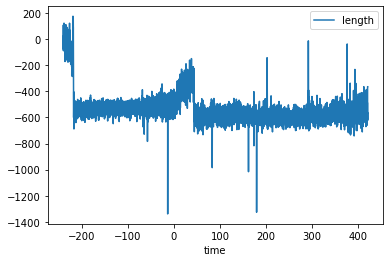

In [127]:
trace.plot(x="time", y=["length"])

In [128]:
window = 300 
trace["median"]= trace["length"].rolling(window).median()
trace["std"] = trace["length"].rolling(window).std()

In [129]:
trace = trace[(trace.length <= trace['median']+3*trace['std']) & (trace.length >= trace['median']-3*trace['std'])]


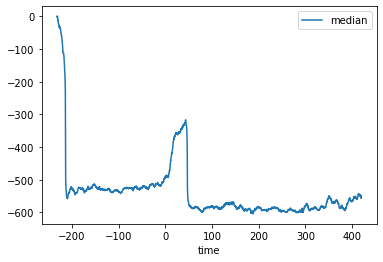

In [130]:
trace.plot(x="time", y=["median"])

In [132]:
#trace["velocity"] = np.diff(trace["median"]) / np.diff ("trace.time")
#print (trace["median"])
#print (trace["time"])


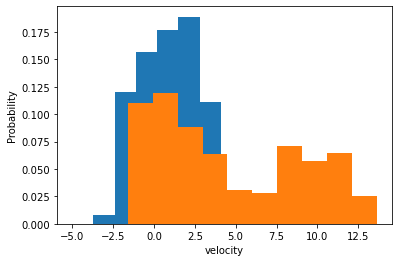

In [120]:
step = 125 
velocity_before = []velocity_after = []

N = len(trace)

time_for_velocity = [trace["time"].iloc[i + step] for i in range (0, N-step)]
for i in range (0, N-step):
    dlength = trace["median"].iloc[i + step] - trace["median"].iloc[i]
    dtime = trace["time"].iloc[i + step] - trace["time"].iloc[i] 
    if trace["time"].iloc[i] < 0 and trace["time"].iloc[i] >= -30 :
        velocity_before.append (dlength / dtime)
        
    if trace["time"].iloc[i] >= 0 and trace["time"].iloc[i] <30  :
        velocity_after.append (dlength / dtime)
        
import matplotlib.pyplot as plt


plt.hist(velocity_before, density=True, bins=10, range = (-5,8))  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('velocity');
  
plt.hist(velocity_after, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('velocity'); 

In [ ]:
plt.hist(velocity_after, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('velocity'); 
